# Курсовая работа № 2
## Аналитика. Начальный уровень

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [2]:
import requests
import re
from datetime import datetime, timedelta

def getjson(url):
    response = requests.get(url)
    response = response.json()
    return response

In [3]:
vk_token = ### SOME ACCESS TOKEN ###

In [4]:
# создаем пустые списки
date_list = []
text_list = []
comments_count_list = []
likes_list = []
views_list = []
date_2_list = []

In [5]:
#проходимся циклом по публикациям и записываем в списки - временя публикации, текст, количество просмотров,лайков, комментариев.
for j in range(0,2500,100):
    url = 'https://api.vk.com/method/wall.get?access_token=' + str(vk_token) + '&owner_id=-66669811&count=100&offset='+str(j)+'&v=5.92' 
    response = getjson(url)
    for i in range(0,len(response['response']['items'])):
        date_list.append(response['response']['items'][i]['date'])
        text_list.append(response['response']['items'][i]['text'])
        comments_count_list.append(response['response']['items'][i]['comments']['count'])
        likes_list.append(response['response']['items'][i]['likes']['count'])
        views_list.append(response['response']['items'][i]['views']['count'])

In [6]:
#преобразуем список с временем публикации в привычный формат
for i in date_list:
    dt = (datetime.fromtimestamp(i) - timedelta(hours=0)).strftime('%Y-%m-%d %H:%M:%S')
    date_2_list.append(dt)

In [7]:
#из полученных список создаем датафрейм
df=pd.DataFrame({'date':date_2_list, 'text':text_list, 'comment_count': comments_count_list, 'likes':likes_list, 'views':views_list})

In [8]:
df['date']=pd.to_datetime(df['date'])

In [9]:
#берем только публикации за 2020 год
df_2020 = df[df['date'].dt.year==2020]

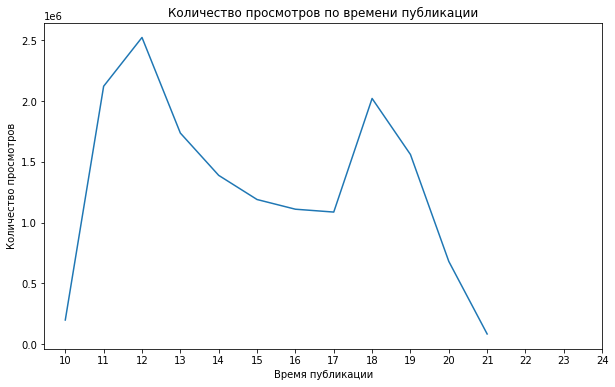

In [35]:
#выводим количество просмотров по времени публикации
views = df_2020.groupby(df_2020['date'].dt.hour)['views'].sum().reset_index()
plt.figure(figsize=[10,6])
plt.title('Количество просмотров по времени публикации')
plt.xlabel('Время публикации')
plt.ylabel('Количество просмотров')
plt.plot(views['date'], views['views'])
plt.xticks(np.arange(10,25,1))


plt.show()

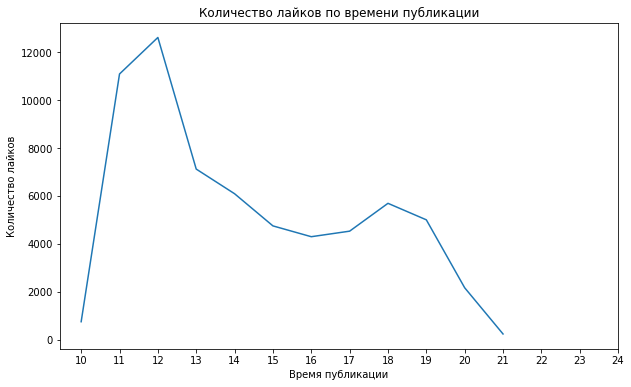

In [36]:
#выводим количество лайков по времени публикации
likes = df_2020.groupby(df_2020['date'].dt.hour)['likes'].sum().reset_index()
plt.figure(figsize=[10,6])
plt.title('Количество лайков по времени публикации')
plt.xlabel('Время публикации')
plt.ylabel('Количество лайков')
plt.plot(likes['date'], likes['likes'])
plt.xticks(np.arange(10,25,1))
plt.show()

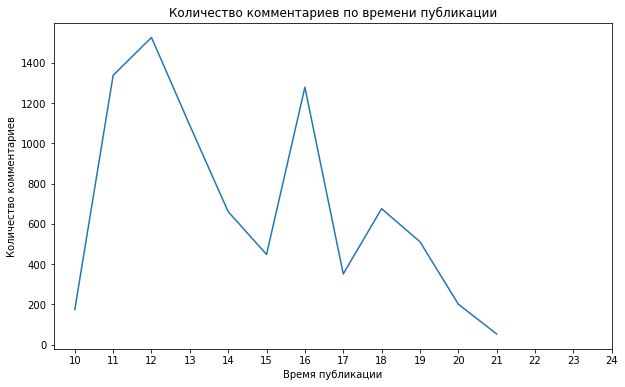

In [37]:
#выводим количество комментариев по времени публикации
comment_count = df_2020.groupby(df_2020['date'].dt.hour)['comment_count'].sum().reset_index()
plt.figure(figsize=[10,6])
plt.title('Количество комментариев по времени публикации')
plt.xlabel('Время публикации')
plt.ylabel('Количество комментариев')
plt.plot(comment_count['date'], comment_count['comment_count'])
plt.xticks(np.arange(10,25,1))
plt.show()

In [39]:
#записываем в переменную регулярное выражение для поиска рубрик
res = r'(#\w+)'

In [40]:
#создаем список и с помощью цикла находим все возможные рубрики и записываем их в список
l = []
for text in df_2020['text']:
    tags=re.findall(res,text)
    if tags in l:
        continue
    else:
        l.append(tags)
l

[['#skillbox'],
 ['#Skillbox'],
 ['#Skillbox_Дизайн', '#Статья_Skillbox'],
 ['#Гороскоп_Skillbox'],
 ['#Skillbox_Маркетинг', '#Статья_Skillbox'],
 ['#Skillbox_Курсы'],
 ['#skillbox_программирование', '#статья_skillbox'],
 ['#Капсула_времени_Skillbox'],
 ['#Расписание_Skillbox'],
 ['#Лекторий_Skillbox'],
 ['#Readymag', '#Skillbox_новости', '#Skillbox_дизайн'],
 ['#Новогодний_марафон_Skillbox'],
 ['#В_закладки_Skillbox'],
 ['#Skillbox_Ruarts'],
 ['#Skillbox_маркетинг', '#В_закладки_Skillbox'],
 ['#Конкурс_Skillbox', '#поиграйтесошрифтами'],
 ['#Статья_Skillbox', '#Skillbox_Маркетинг'],
 ['#Конкурс_Skillbox'],
 ['#Качаем_креатив', '#Skillbox_маркетинг'],
 ['#Skillbox_дизайн', '#В_закладки_Skillbox'],
 ['#скиллбокс_рф'],
 ['#Дизайн_Баттл_Skillbox', '#Skillbox_дизайн'],
 ['#Статья_Skillbox', '#Skillbox_Игры'],
 ['#В_Закладки_Skillbox'],
 ['#Статья_Skillbox', '#Skillbox_Программирование'],
 ['#Кейс_Skillbox', '#Skillbox_маркетинг'],
 ['#Айдентика_Skillbox', '#Skillbox_дизайн'],
 ['#Дизайн_ба

In [41]:
#создаем датафрейм с рубрикой #Skillbox_Программирование
df_2020_prog = df_2020.loc[df_2020['text'].str.contains("#Skillbox_Программирование")]
df_2020_prog = df_2020_prog.groupby(df_2020_prog['date'].dt.month)[['likes','views']].sum().reset_index()

In [42]:
#создаем датафрейм с рубрикой #Skillbox_дизайн
df_2020_design = df_2020.loc[df_2020['text'].str.contains("#Skillbox_дизайн")]
df_2020_design = df_2020_design.groupby(df_2020_design['date'].dt.month)[['likes','views']].sum().reset_index()

In [43]:
#создаем датафрейм с рубрикой #Skillbox_маркетинг
df_2020_marketing = df_2020.loc[df_2020['text'].str.contains("#Skillbox_маркетинг")]
df_2020_marketing = df_2020_marketing.groupby(df_2020_marketing['date'].dt.month)[['likes','views']].sum().reset_index()

In [44]:
#создаем датафрейм с рубрикой #Skillbox_Управление
df_2020_control = df_2020.loc[df_2020['text'].str.contains("#Skillbox_Управление")]
df_2020_control = df_2020_control.groupby(df_2020_control['date'].dt.month)[['likes','views']].sum().reset_index()

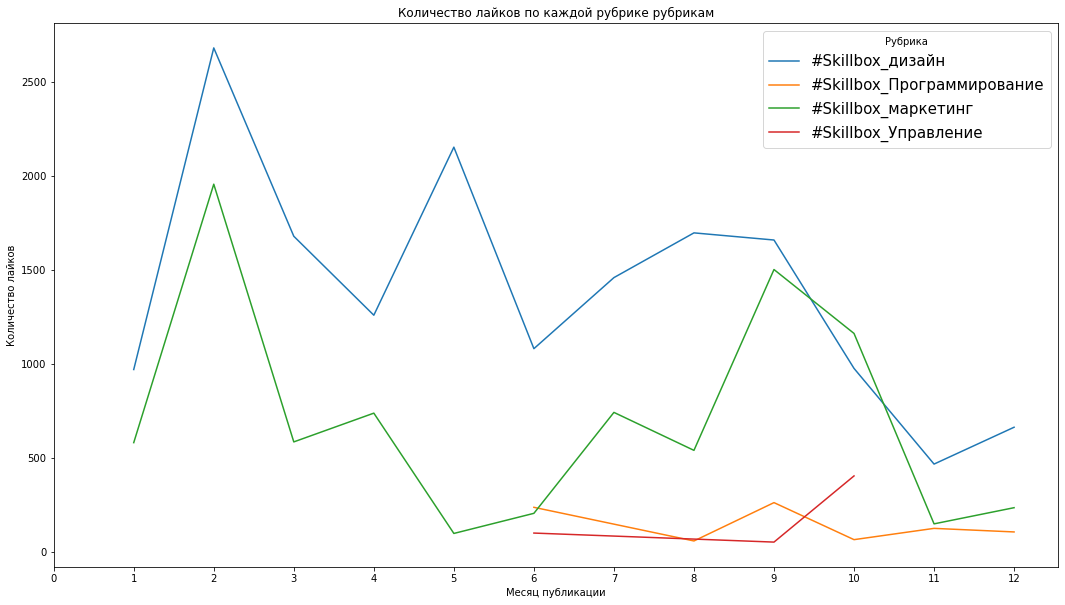

In [69]:
#выводим количество лайков по каждой рубрике 
fig, ax = plt.subplots(figsize=[18,10])
plt.plot(df_2020_design['date'], df_2020_design['likes'], label='#Skillbox_дизайн')
plt.plot(df_2020_prog['date'], df_2020_prog['likes'], label='#Skillbox_Программирование')
plt.plot(df_2020_marketing['date'], df_2020_marketing['likes'], label='#Skillbox_маркетинг')
plt.plot(df_2020_control['date'], df_2020_control['likes'], label='#Skillbox_Управление')
plt.title('Количество лайков по каждой рубрике рубрикам')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество лайков')
plt.legend(prop={'size': 15,}, title='Рубрика')
plt.xticks(np.arange(0,13,1))
plt.show()

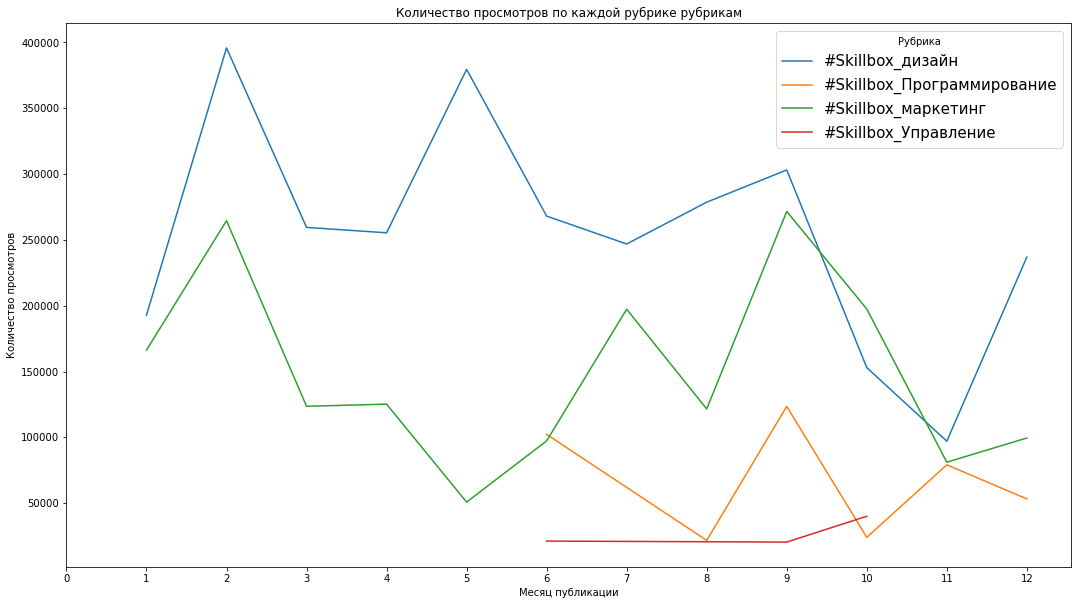

In [70]:
#выводим количество просмотров по каждой рубрике 
fig, ax = plt.subplots(figsize=[18,10])
plt.plot(df_2020_design['date'], df_2020_design['views'], label='#Skillbox_дизайн')
plt.plot(df_2020_prog['date'], df_2020_prog['views'], label='#Skillbox_Программирование')
plt.plot(df_2020_marketing['date'], df_2020_marketing['views'], label='#Skillbox_маркетинг')
plt.plot(df_2020_control['date'], df_2020_control['views'], label='#Skillbox_Управление')
plt.title('Количество просмотров по каждой рубрике рубрикам')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество просмотров')
plt.legend(prop={'size': 15}, title='Рубрика')
plt.xticks(np.arange(0,13,1))
plt.show()

Для анализа был взят 2020 год, т.к. это наиболее актуальные данные для анализа - 2019 г. слишком поздно, 2021 мало данных.

Как видно на графиках наибольшая активность пользователей (просмотры, лайки, комментарии) наблюдается на промежутке с 10 до 12 часов. Так же есть небольшой подъем активности в районе 18 часов, но он наблюдается только по просмотрам.

Если рассматривать отдельно рубрики, то имеется спад по активности пользователей к концу года.

SMM-отделу следует рассмотреть возможность публикации постов только в 1 половине дня (до 12 часов), т.к. в этот период наблюдается наивышая активность пользователей, а так же как то стимулировать пользователей в конце года.

